In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
conn = sqlite3.connect('database.sqlite3')
c = conn.cursor()

In [3]:
def make_df(curs):
    names = [description[0] for description in curs.description]
    df = pd.DataFrame(curs.fetchall(), columns = names)
    return df

In [4]:
c.execute('''SELECT * FROM grade_distributions''')
df = make_df(c)

In [5]:
df.head()

,course_offering_uuid,section_number,n_count,c_count,f_count,cr_count,p_count,nw_count,other_count,bc_count,u_count,d_count,ab_count,a_count,s_count,i_count,b_count,nr_count
0,344b3ebe-da7e-314c-83ed-9425269695fd,1,0,0,0,0,0,0,0,0,0,0,0,105,0,0,0,0
1,f718e6cd-33f0-3c14-a9a6-834d9c3610a8,1,0,0,0,0,0,0,0,0,0,0,0,158,0,1,0,0
2,ea3b717c-d66b-30dc-8b37-964d9688295f,1,0,3,0,0,0,0,0,0,0,0,12,139,0,0,2,0
3,075da420-5f49-3dd0-93df-13e3c152e1b1,1,0,0,0,0,0,0,0,0,0,0,0,87,0,1,0,0
4,2b4e216d-a728-3713-8c7c-19afffc6b2fd,1,0,0,0,0,0,0,0,0,0,0,0,70,0,1,0,0


In [7]:
df['a_count'] = df['a_count'].astype(int)

In [8]:
df['n_count'] = df['n_count'].astype(int)

In [9]:
df['a_count'].sum()/df['n_count'].sum()

1536.8188235294117

In [10]:
df['a_count'].sum()

1306296

In [316]:
from scipy import stats
stats.pareto.fit(df_minus_Hebrew['prop_high'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Estimated location parameter for the data.


(87713.98434686995, -49739.01461616624, 49739.01461622803)

In [319]:
df_minus_Hebrew['pareto_high'] = df['prop_high']**stats.pareto.fit(df_minus_Hebrew['prop_high'])[2]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Estimated location parameter for the data.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [321]:
df_minus_Hebrew['pareto_pass'] = df['prop_pass']**stats.pareto.fit(df_minus_Hebrew['prop_high'])[0]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Estimated location parameter for the data.
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
df_minus_Hebrew['boxcox_prop_high']=scipy.stats.boxcox(df_minus_Hebrew['prop_high'],lmbda = -3)[0]

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [292]:
df_minus_Hebrew['log_prop_high']=np.log(df_minus_Hebrew['prop_high'])

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [312]:
from sklearn.preprocessing import quantile_transform
trans = quantile_transform(df_minus_Hebrew['prop_high'].as_matrix().reshape(-1,1))
x = trans.flatten()
df_minus_Hebrew['trans_prop_high'] = x

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


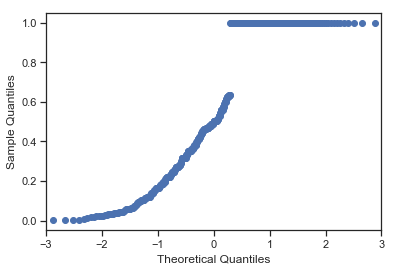

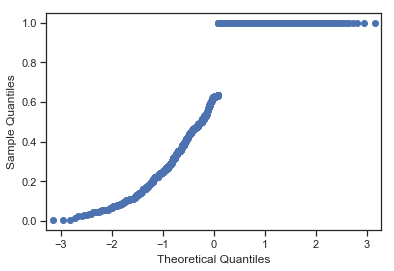

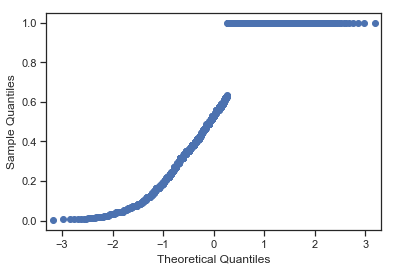

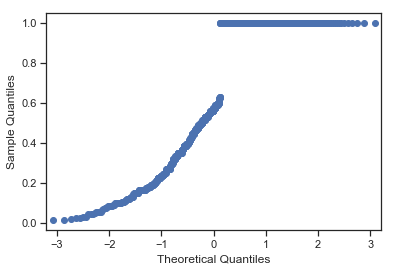

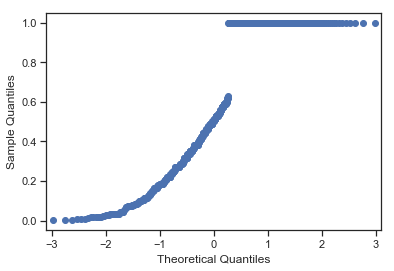

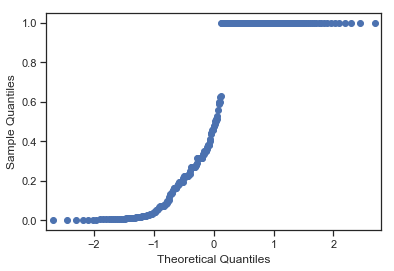

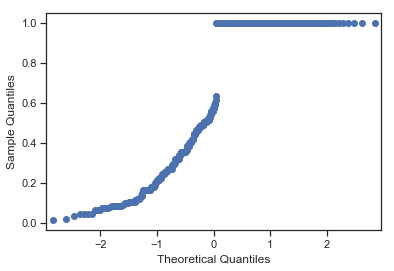

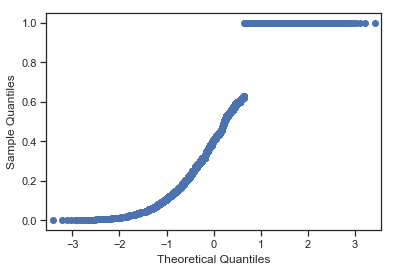

In [313]:
from statsmodels.graphics.gofplots import qqplot
for group in subj.groups:
    qqplot(df_minus_Hebrew[df_minus_Hebrew['subject_name']== group]['trans_prop_high'])

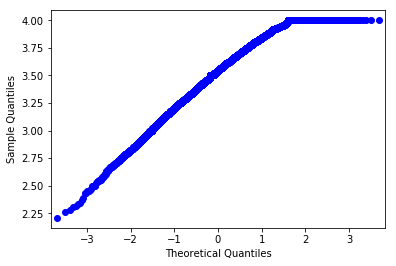

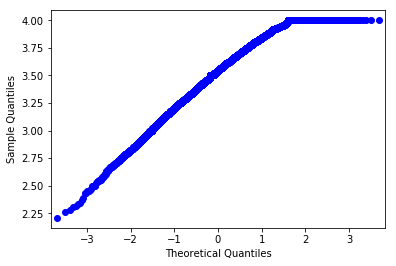

In [234]:
from statsmodels.graphics.gofplots import qqplot
qqplot(df_minus_Hebrew['avg_grade'])

In [125]:
scipy.stats.f_oneway(*[list(df_minus_Hebrew[df_minus_Hebrew['subject_name']== group]['avg_grade']) for group in subj.groups])

F_onewayResult(statistic=164.38383986473946, pvalue=4.091182415263636e-229)